In [3]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv';

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

Downloading the data

In [5]:
from urllib.request import urlretrieve

In [6]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x2b273781090>)

Using pandas to create the dataframe

In [7]:
import pandas as pd

In [8]:
medical_df = pd.read_csv('medical.csv')

In [9]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Checking datatype of each column

In [10]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Let's look onto some statistics of data

In [11]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Exploratory Analysis and Visualization
Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

%matplotlib inline this line is specifically so that the jupyter notebook shows output in NB itself not as a pop up

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [14]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

x=age is for x-axis, marginal=box so it plots a boxplot above graph, nbins = 47 is total number of boxes as 18 subtracts 64

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

Body Mass Index

In [16]:
fig = px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [17]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law".

There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \7300, the median for smokers is close to 7300,the median for smokers is close to 35,000.

Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [18]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [19]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?

Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [20]:
fig = px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [21]:
fig = px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI vs Charges')
fig.update_selections(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [22]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [23]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

To compute the correlation for categorical columns, they must first be converted into numeric columns

In [24]:
smoker_values = {'no' : 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [25]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

Here's how correlation coefficients can be interpreted (source):

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually (source):
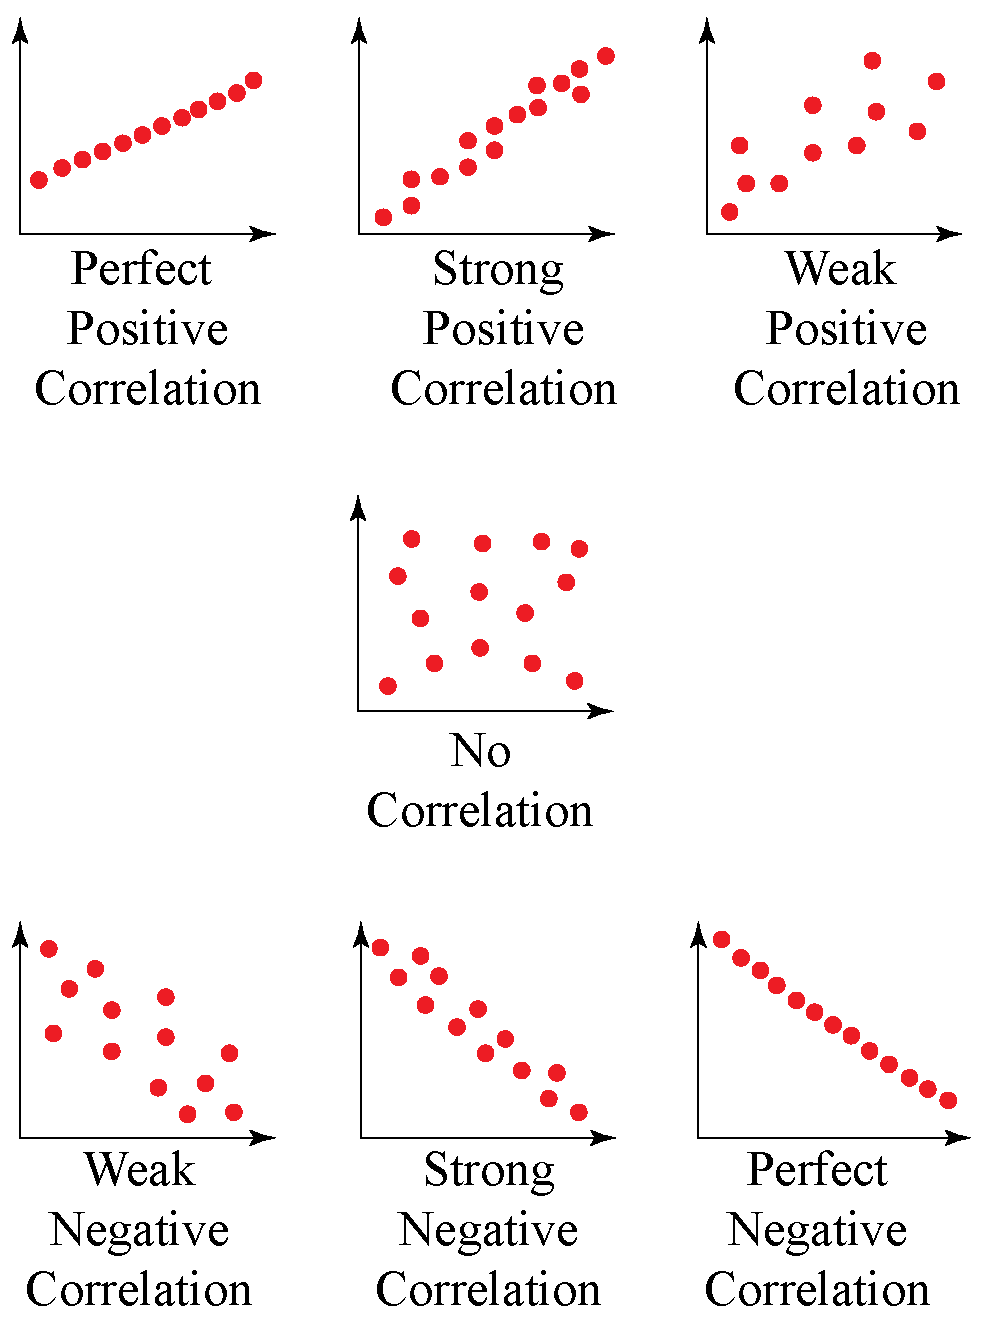


The correlation coefficient has the following formula:
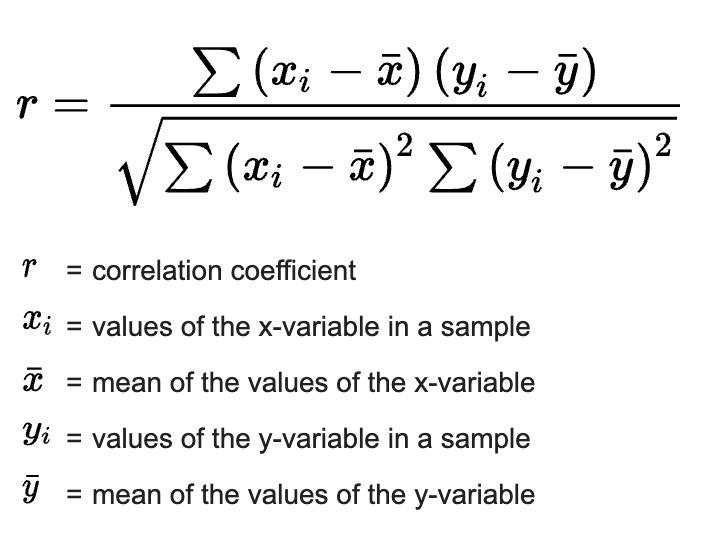

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

In [26]:
numeric_df = medical_df[['age','bmi','children','charges']]
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

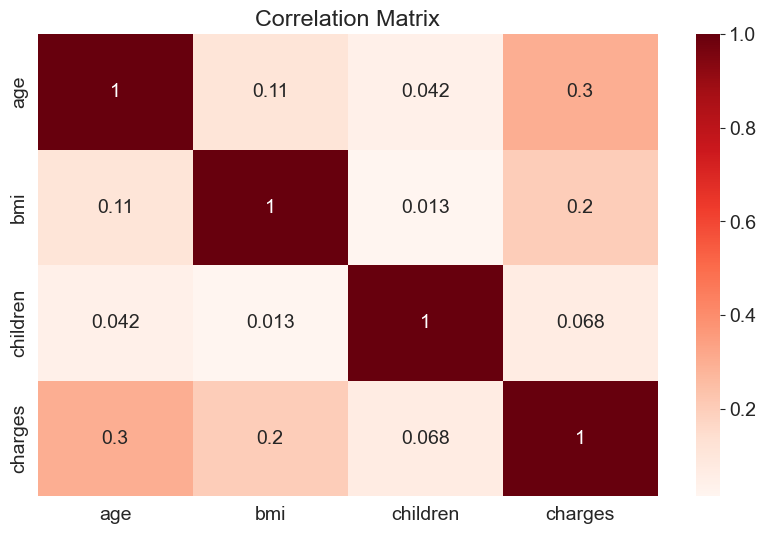

In [27]:
sns.heatmap(correlation_matrix,cmap='Reds',annot=True)
plt.title('Correlation Matrix')

Correlation vs causation fallacy: Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features X and Y can be correlated if X causes Y or if Y causes X, or if both are caused independently by some other factor Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that X are Y simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

Linear Regression Using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [28]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

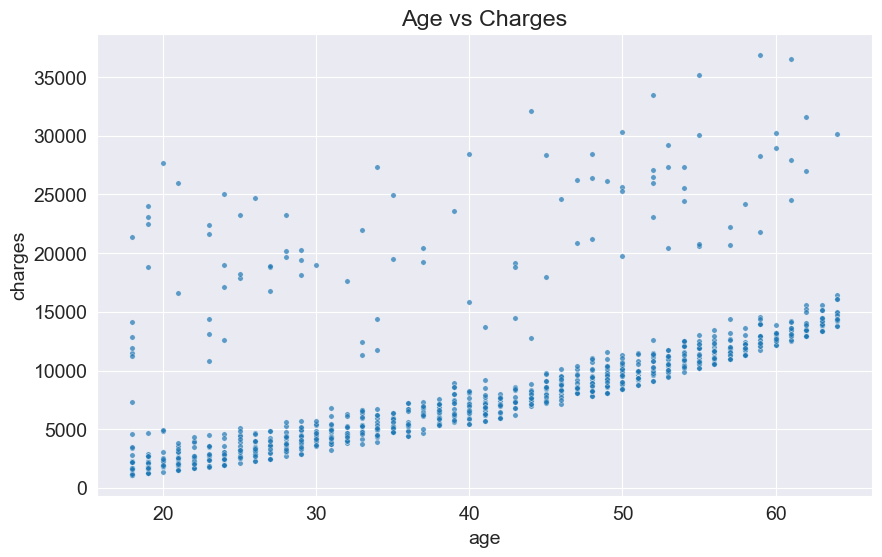

In [29]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

y=wx+b

The line is characterized two numbers: w (called "slope") and b (called "intercept").

Model
In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

charges=w×age+b

We'll try determine w and b for the line that best fits the data.

This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

The numbers w and b are called the parameters or weights of the model.

The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute charges, given age, w and b.

In [30]:
def estimate_charges(age, w, b):
    return w * age + b

The estimate_charges is first model 
Let's guess the values of w and b and use them to estimate the value of charges

In [31]:
w = 50
b = 100

In [32]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [33]:
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [34]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Our model values and actual values are very different from each other 

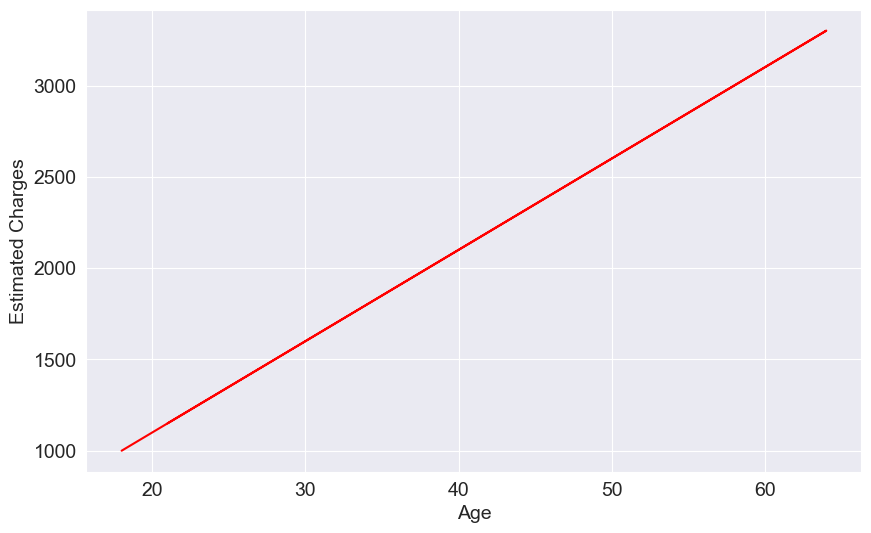

In [35]:
plt.plot(ages, estimated_charges, 'r-');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

This above plot is of our model's output

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our model fits the data.

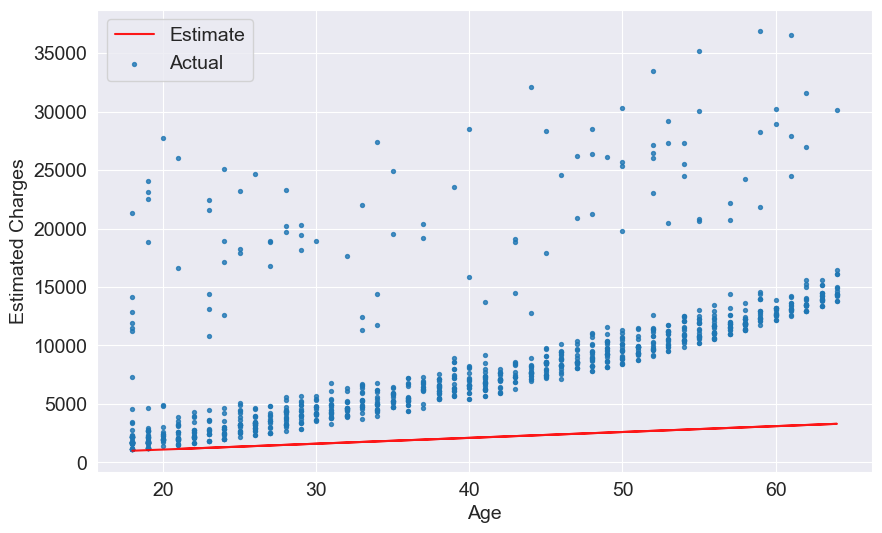

In [36]:
target = non_smoker_df.charges
plt.plot(ages,estimated_charges, 'r', alpha=0.9);
plt.scatter(ages,target,s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');
plt.legend(['Estimate', 'Actual']);


Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of w and b to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [37]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages,w,b);
    
    plt.plot(ages,estimated_charges,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Estimated Charges');
    plt.legend(['Estimate', 'Actual']);

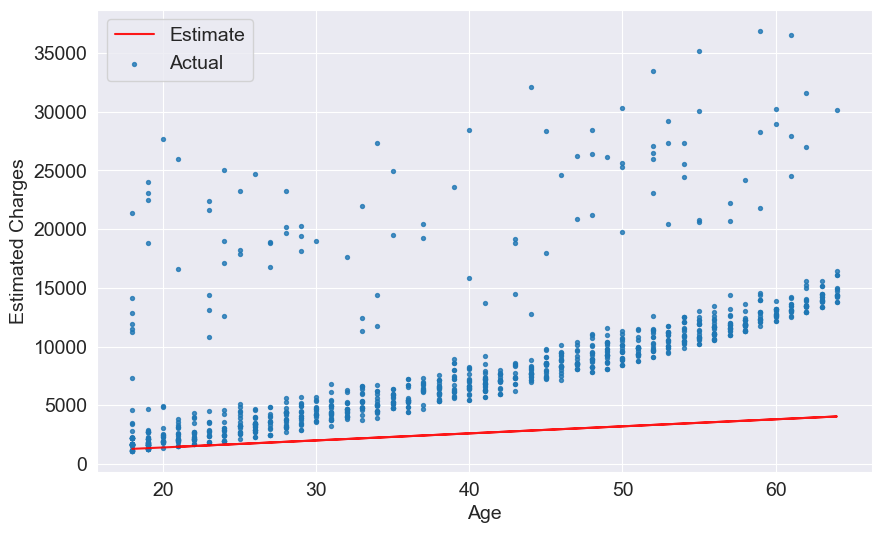

In [38]:
try_parameters(60,200)

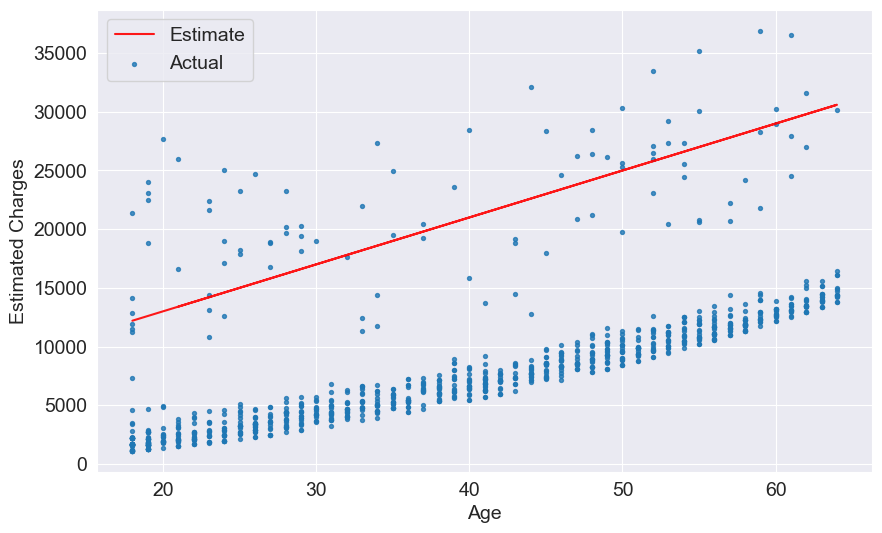

In [39]:
try_parameters(400,5000)

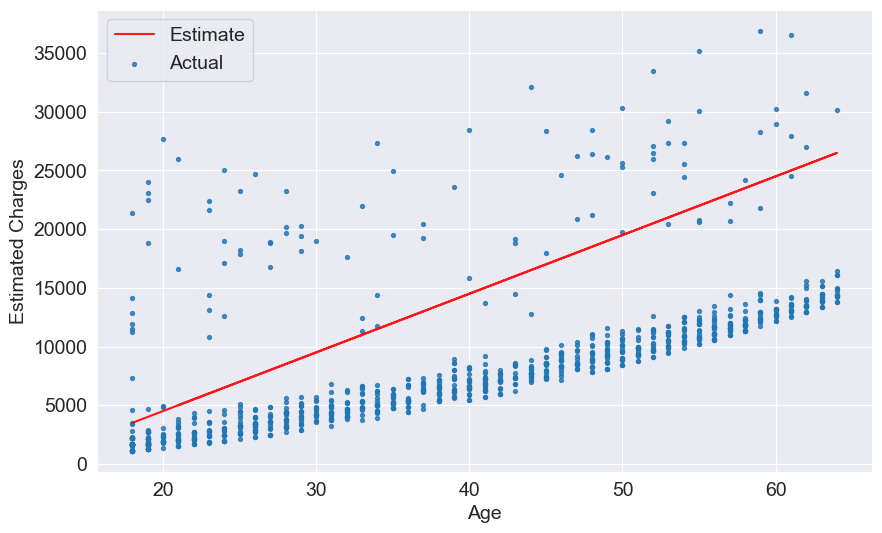

In [40]:
try_parameters(500,-5500)

As we change the values, of w and b manually, trying to move the line visually closer to the points, we are learning the approximate relationship between "age" and "charges".

Wouldn't it be nice if a computer could try several different values of w and b and learn the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

We need a way to measure numerically how well the line fits the points.

Once the "measure of fit" has been computed, we need a way to modify w and b to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line, starting from a random guess.

Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the result
The result is a single number, known as the root mean squared error (RMSE). The above description can be stated mathematically as follows:

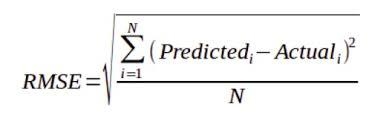

Geometrically, the residuals can be visualized as follows:
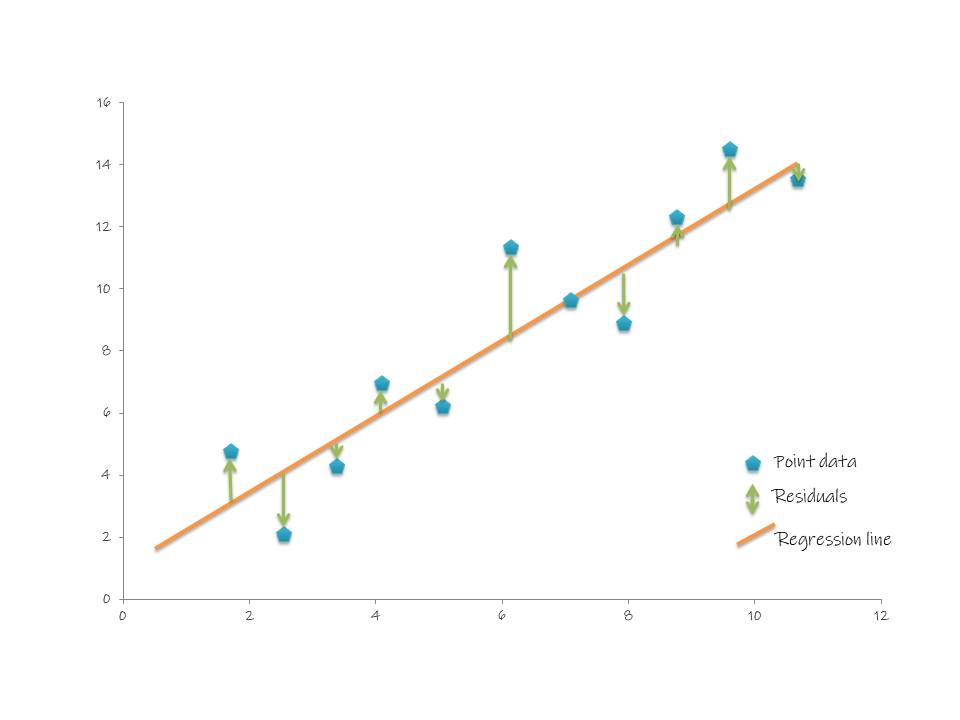

Let's define a function to compute the RMSE.

Calculate the difference between the targets and predictions (the differenced is called the "residual")

In [41]:
target = non_smoker_df.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [42]:
prediction = estimated_charges
prediction

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Now what we have to do is subtract the value of target with prediction to calculate the difference the only problem here is that some values which may come will be negative or some will be higher

So for that reason whatever comes the answer we perform square of it to avoid negative values

Then we sum all of the squared values to find the average of it

Then at last we take the square root of the result

We use RMSE for it

In [43]:
import numpy as np

In [44]:
def rmse(target,prediction): 
    return np.sqrt(np.mean(np.square(target-prediction)))

In [45]:
w = 50
b = 100

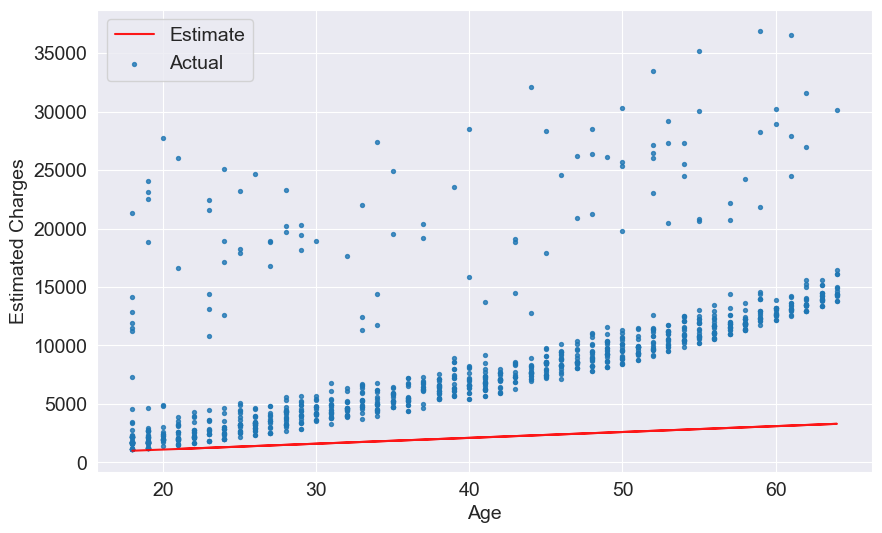

In [46]:
try_parameters(w,b)

In [47]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age,w,b)
 

In [48]:
rmse(targets,predicted)

np.float64(8461.949562575493)

Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by \$8461.

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the try_parameters functions to also display the loss

In [49]:
def try_parameters(w,b):
    ages = non_smoker_df.age;
    target = non_smoker_df.charges
    predictions = estimate_charges(ages,w,b);
    
    plt.plot(ages,predictions,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Prediction','Actual']);
    
    loss = rmse(target,predictions)
    print("RMSE Loss:", loss)

RMSE Loss: 8461.949562575493


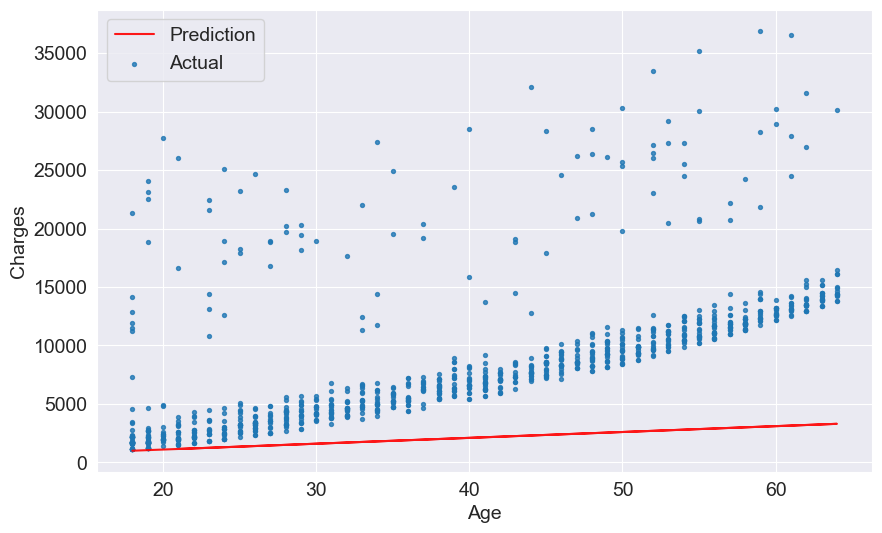

In [50]:
try_parameters(50,100)

Optimizer

Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)
Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.

Here's a visualization of how gradient descent works:
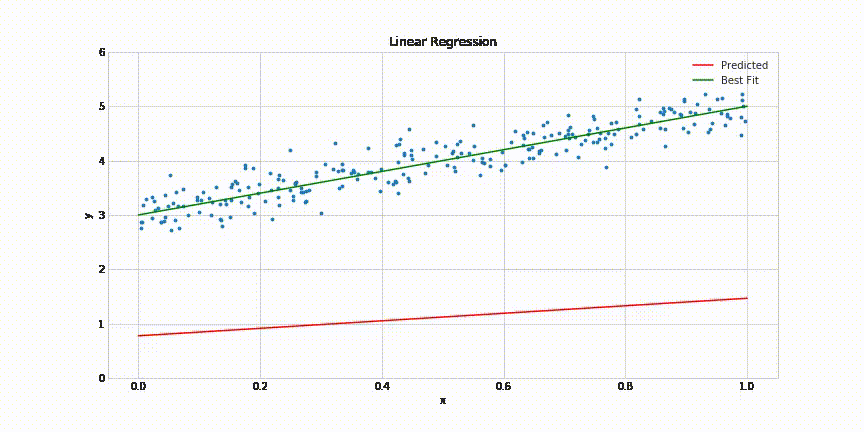

This above image is actually a gif but for some reasons it is not working what is actually in the gif is that red line is moving above close to blue to reduce the loss nothing more

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?

Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

Next, we can use the fit method of the model to find the best fit line for the inputs and targets.

In [53]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.

Not that the input X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [54]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape: ', inputs.shape);
print('targets.shape: ', targets.shape);

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


Let's fit the model to the data

In [55]:
model.fit(inputs, targets)

LinearRegression()

Lowest possible value of W and B is found 

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [56]:
model.predict(np.array([[23],[37],[61]]))

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Do these values seem reasonable? Compare them with the scatter plot above.

Let compute the predictions for the entire set of inputs

In [57]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [58]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [59]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Let's compute the RMSE of the model

In [60]:
rmse(targets,predictions)

np.float64(4662.505766636395)

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the coef_ and intercept_ properties.

Where coef is infact our W and intercept_ is infact our B

In [61]:
model.coef_

array([267.24891283])

In [62]:
model.intercept_

np.float64(-2091.4205565650864)

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE Loss: 4662.505766636395


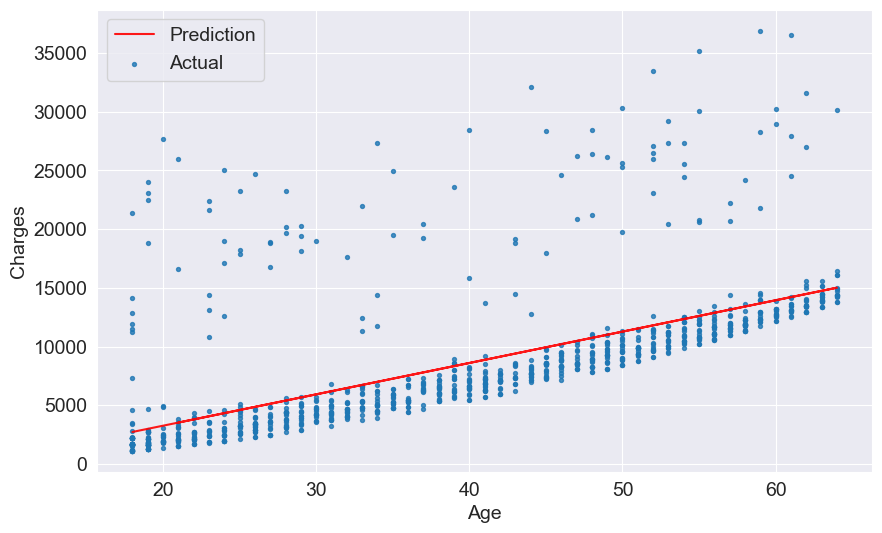

In [63]:
try_parameters(model.coef_,model.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.

Linear Regression using Multiple Features
So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

charges=w1×age+w2×bmi+b

We need to change just one line of code to include the BMI.

In [64]:
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']

In [65]:
model = LinearRegression().fit(inputs,targets)

In [66]:
predictions = model.predict(inputs)

In [67]:
loss = rmse(targets,predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [68]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

In [69]:
fig = px.scatter(non_smoker_df, x = 'bmi', y='charges',title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.


In [70]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3,marker_opacity=0.5);
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss.

Let's also check the parameters of the model.

In [71]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

charges=w1×age+w2×bmi+w3×children+b

In [72]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

In [73]:
fig = px.violin(non_smoker_df, x='children', y='charges', title='Children vs Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [74]:
inputs,targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

In [75]:
model = LinearRegression().fit(inputs, targets)

In [76]:
predictions = model.predict(inputs)

In [77]:
loss = rmse(targets, predictions)

In [78]:
print('Loss: ', loss)

Loss:  4608.470405038246


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BM

Now we see are performing linear regression on a smoker_df dataset 

In [79]:
smoker_df = medical_df[medical_df.smoker == 'yes'];

In [80]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [81]:
smoker_df.count

<bound method DataFrame.count of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]>

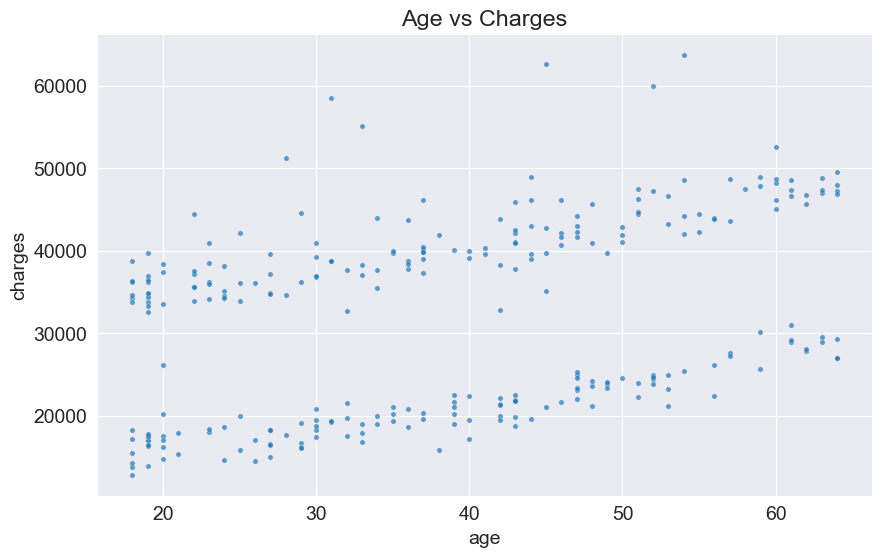

In [83]:
plt.title('Age vs Charges');
sns.scatterplot(data=smoker_df,x='age',y='charges',alpha=0.7,s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

y=wx+b

The line is characterized two numbers: w (called "slope") and b (called "intercept").

In [84]:
ages = smoker_df.age
estimated_charges = estimate_charges(ages,w,b)

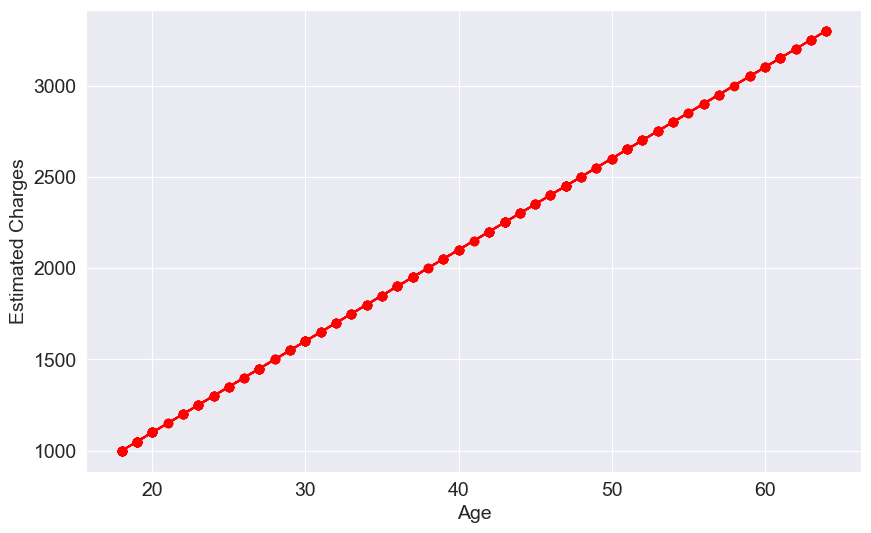

In [85]:
plt.plot(ages,estimated_charges,'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

In [86]:
target = smoker_df.charges

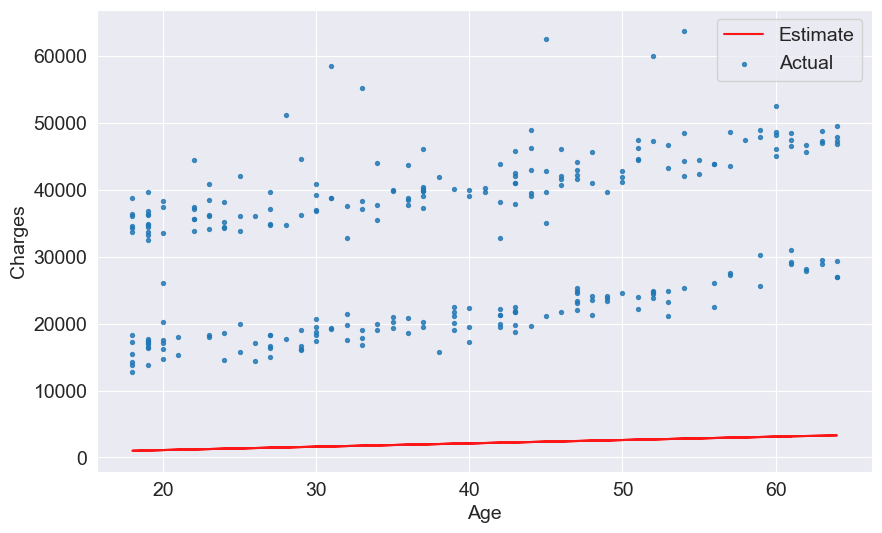

In [87]:
plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate','Actual']);

In [88]:
def try_parameters(w,b):
    ages = smoker_df.age
    target = smoker_df.charges
    
    estimated_charges = estimate_charges(ages,w,b);
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

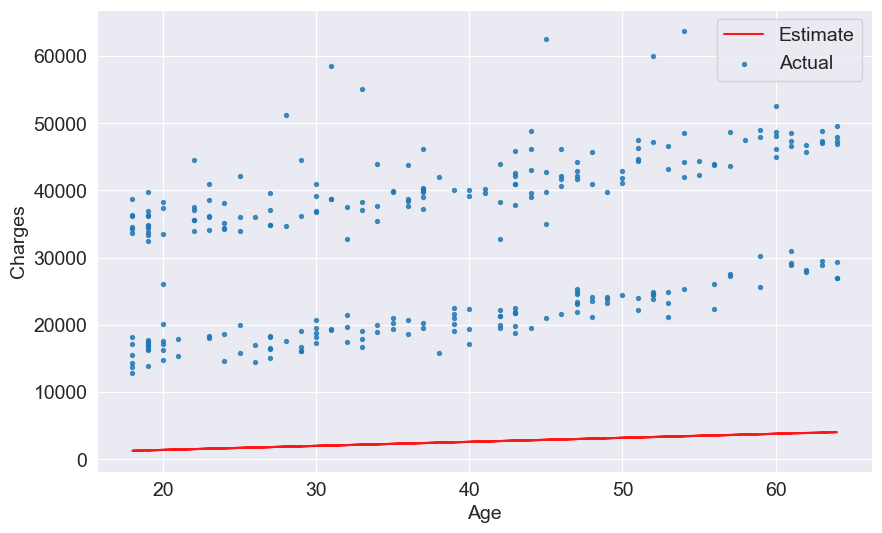

In [89]:
try_parameters(60,200);

In [90]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

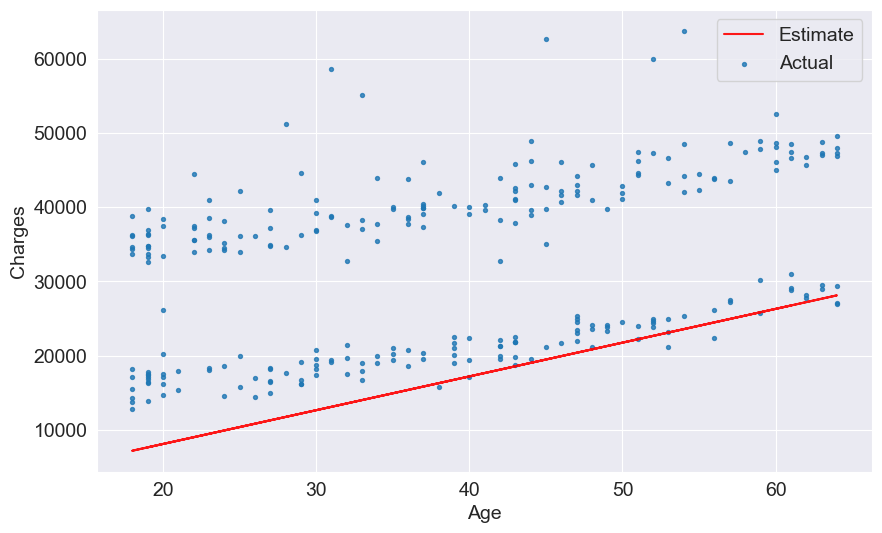

In [109]:
w = 455
b = -1000
try_parameters(w,b)

In [93]:
targets = smoker_df['charges'];
predicted = estimate_charges(smoker_df.age, w, b);

In [111]:
rmse(targets, predicted)

np.float64(32074.58722734571)

In [112]:
def try_parameters(w , b):
    ages = smoker_df.age
    target = smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Predictions', 'Actual'])
    
    loss = rmse(target, predictions)
    print('RMSE Loss: ', loss)

RMSE Loss:  20586.93265972806


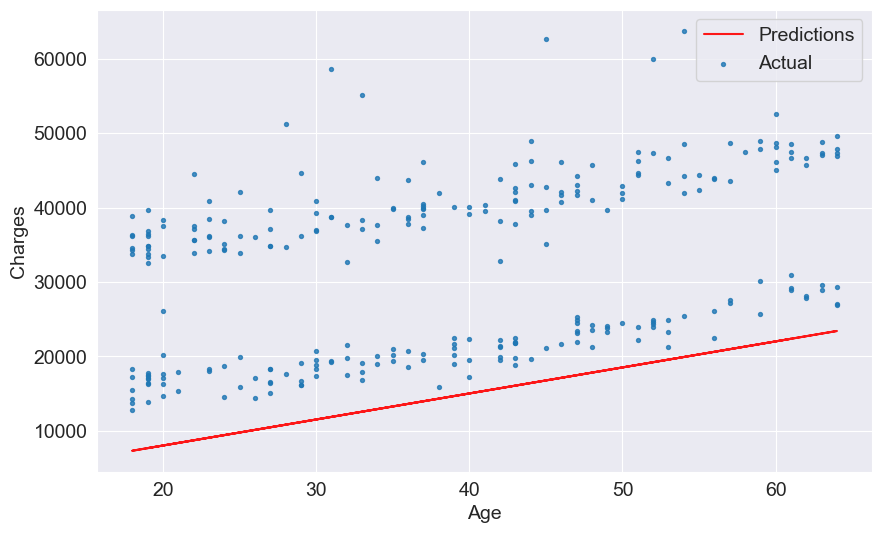

In [125]:
try_parameters(350,1000)

Using The Optimizer

In [126]:
model = LinearRegression()

In [127]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [159]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('Inputs Shape: ', inputs.shape)
print('Target Shape: ', targets.shape)

Inputs Shape:  (274, 1)
Target Shape:  (274,)


In [160]:
model.fit(inputs, targets)

LinearRegression()

In [161]:
model.predict(np.array([[23],[37],[61]]))

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 31587.91940498, 38913.62185562])

In [163]:
predictions = model.predict(inputs)
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [164]:
rmse(targets, predictions)

np.float64(10711.00334810241)

RMSE Loss:  10711.00334810241


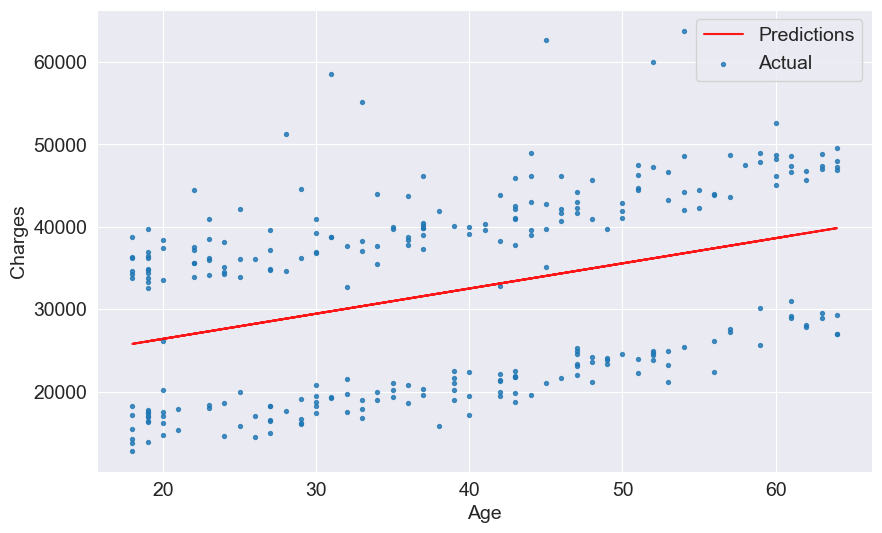

In [165]:
try_parameters(model.coef_, model.intercept_)

In [166]:
inputs, targets = smoker_df[['age']], smoker_df['charges']

In [167]:
model = LinearRegression().fit(inputs, targets)

In [168]:
predictions = model.predict(inputs)

In [169]:
loss = rmse(targets, predictions)

In [170]:
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  10711.00334810241


In [171]:
# Create inputs and targets
inputs, targets = smoker_df[['age', 'bmi']], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5722.782238884456


As we can see from above prediction we have significantly improved the value of loss

In [172]:
smoker_df.charges.corr(smoker_df.bmi)

np.float64(0.8064806070155403)

In [173]:
fig = px.scatter(smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [174]:
model.coef_, model.intercept_

(array([ 266.29222371, 1438.09098289]), np.float64(-22367.449727751246))

In [175]:
smoker_df.charges.corr(smoker_df.children)

np.float64(0.035945005812685865)

In [176]:
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5718.202480524154


Now lets do it using Categorical data to see if we have can improve the loss

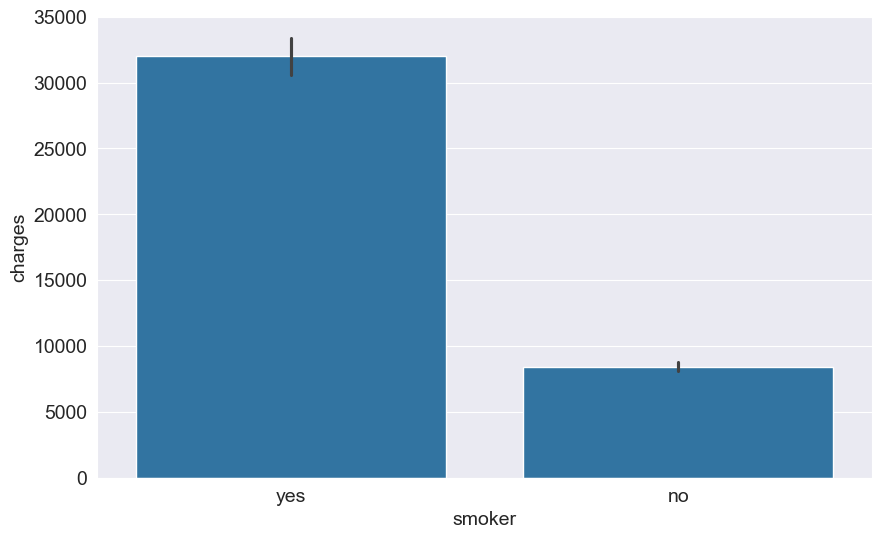

In [177]:
sns.barplot(data=medical_df, x='smoker', y='charges');

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

In [178]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [179]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984778)

We can now use the smoker_df column for linear regression.

charges=w1×age+w2×bmi+w3×children+w4×smoker+b

In [187]:
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df['charges'];
model = LinearRegression().fit(inputs, targets);
predictions = model.predict(inputs);
loss = rmse(targets, predictions);
print('Loss:', loss);

Loss: 6056.439217188081


As adding smoker_code increased the value of loss so it is clearly it is not at all helping other than making it worse

Let's try adding the "sex" column as well.

charges=w1×age+w2×bmi+w3×children+w4×smoker+w5×sex+b

<Axes: xlabel='sex', ylabel='charges'>

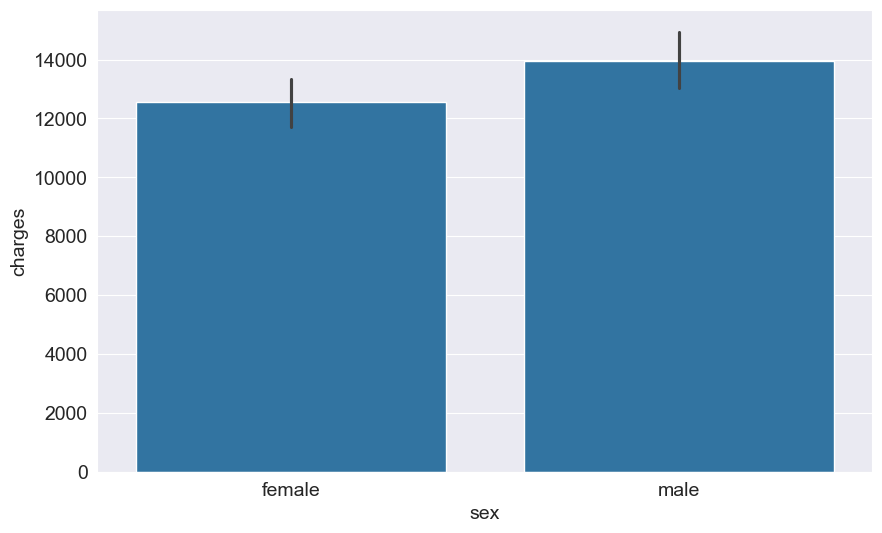

In [181]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [182]:
sex_codes = {'female':0,'male':1}

In [183]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [184]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.05729206220202533)

In [186]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11336.133773688362


Clearly adding sex with prediction clearly made it more worse than before

One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.
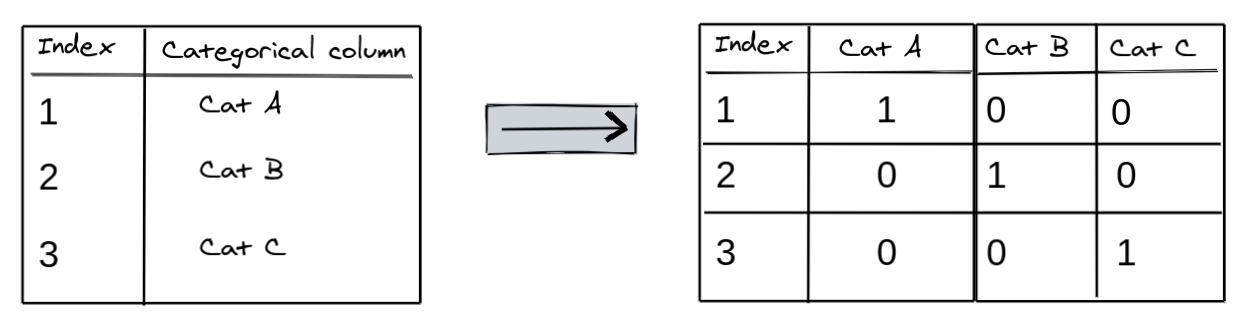

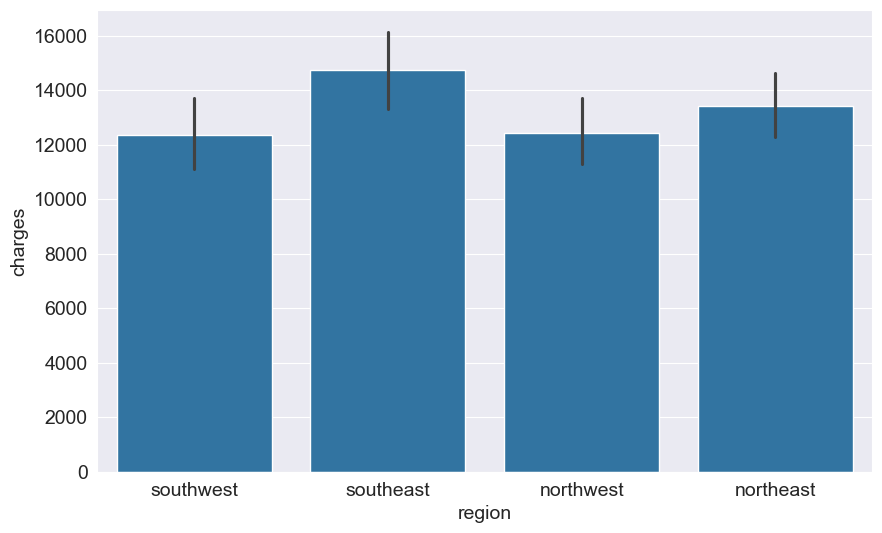

In [188]:
sns.barplot(data=medical_df, x='region', y='charges');

In [189]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [190]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [191]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [192]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [193]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11333.372237378664


Again Worse

Model Improvements

Feature Scaling
Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

charges=w1×age+w2×bmi+w3×children+w4×smoker+w5×sex+w6×region+b

To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [194]:
model.coef_

array([ 241.00137597,  319.78391227,  565.48709076,  645.42374437,
       -391.87334376,  714.45461385, -968.00501445])

In [195]:
model.intercept_

np.float64(-6623.690223475463)

In [196]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,241.001376
1,bmi,319.783912
2,children,565.487091
3,northeast,645.423744
4,northwest,-391.873344
5,southeast,714.454614
6,southwest,-968.005014
7,1,-6623.690223


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

We can't compare the weights of different column to identify which features are important
A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

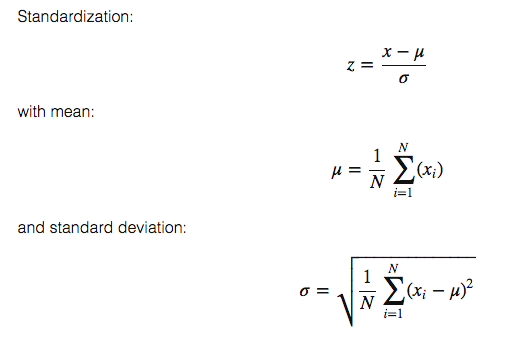

In [197]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [200]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [201]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [202]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These can now we combined with the categorical data

In [203]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [204]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


We can now compare the weights in the formula:

charges=w1×age+w2×bmi+w3×children+w4×smoker+w5×sex+w6×region+b

In [206]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI